How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [172]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [173]:
crops.head(10)

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
5,69,37,42,7.073454,rice
6,69,55,38,5.700806,rice
7,94,53,40,5.718627,rice
8,89,54,38,6.685346,rice
9,68,58,38,6.336254,rice


In [174]:
# Write your code here
missing_values = crops.isnull().sum().sum()
missing_values

0

In [175]:
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

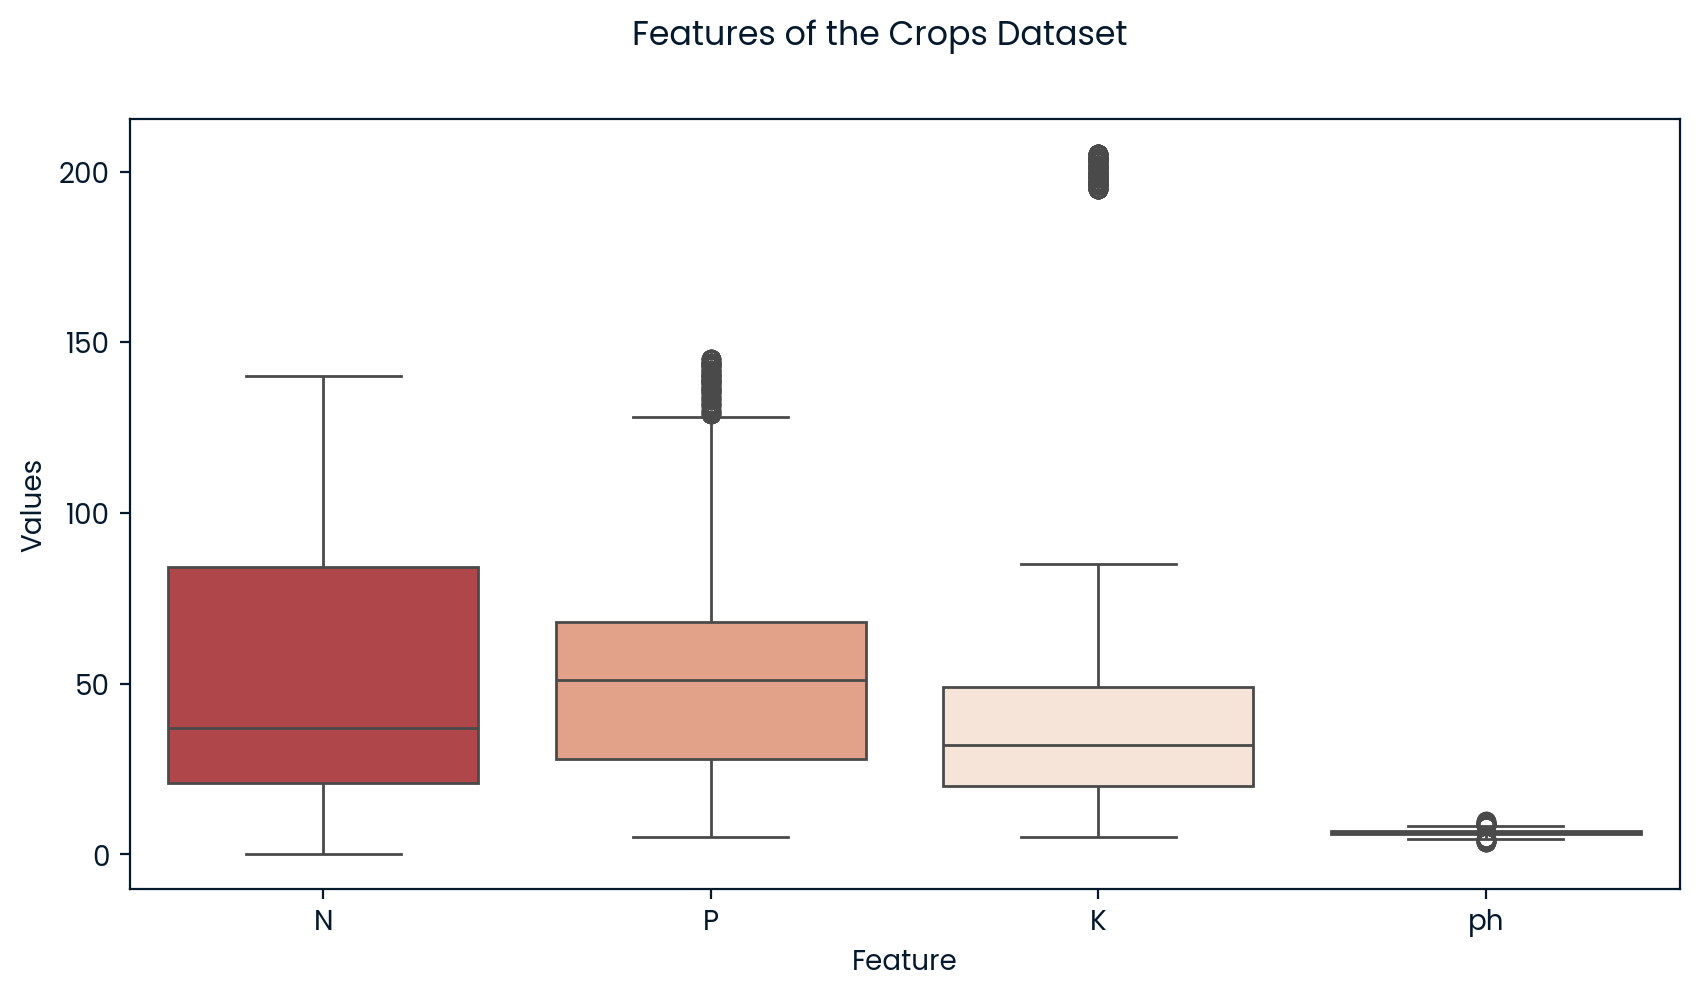

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("RdBu")
plt.figure(figsize=(10, 5))
g = sns.boxplot(data=crops)
plt.suptitle("Features of the Crops Dataset")
plt.xlabel("Feature")
plt.ylabel("Values")
plt.show()

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def calculate_feature_performance(X_train, y_train, X_test, y_test, features):
  """
  Calculates the F1 score (weighted average) for each feature in the provided list.

  This function iterates through a list of features, trains a Logistic Regression model
  on the training data for each feature, makes predictions on the testing data, and
  calculates the weighted F1 score. The F1 scores are then stored in a dictionary
  where keys are feature names and values are their corresponding F1 scores.

  Args:
    X_train: Training data features (explanatory variables).
    y_train: Training data target variable (dependent variable).
    X_test: Testing data features.
    y_test: Testing data target variable.
    features: A list of feature names to evaluate.

  Returns:
    A dictionary where keys are feature names and values are their weighted F1 scores.
  """

  feature_performance = {}
    
  for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class='multinomial')
    log_reg.fit(X_train[[feature]], y_train)  # Train on single feature column
    prediction = log_reg.predict(X_test[[feature]])  # Predict using single feature
    
    f1_score = metrics.f1_score(y_test, prediction, average='weighted')
    feature_performance[feature] = f1_score
    print(f"F1-score for {feature}: {f1_score}")
    
  return feature_performance

In [178]:
def best_predictive_feature(feature_performance):
    """
    Finds the feature with the highest F1 score.

    Args:
        feature_performance: A dictionary where keys are feature names and values are F1 scores.

    Returns:
        The name of the feature with the highest F1 score and its score.
    """
    best_feature = max(feature_performance, key=feature_performance.get)
    best_score = feature_performance[best_feature]
    print(f"Best feature: {best_feature} with F1 score: {best_score}")
    return best_feature, best_score

In [179]:
# Determine the dependent (X) and independent (y) variable
X = crops.drop(columns="crop")
y = crops['crop']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=21, 
                                                    stratify=y)

features = ["N", "P", "K", "ph"]
feature_performance = calculate_feature_performance(X_train, y_train, X_test, y_test, features)
best_predictive_feature(feature_performance)

F1-score for N: 0.13470619325835503
F1-score for P: 0.16143744153390266
F1-score for K: 0.2584384395240381
F1-score for ph: 0.08890612532412938
Best feature: K with F1 score: 0.2584384395240381


('K', 0.2584384395240381)

In [180]:
best_predictive_feature = {"K": feature_performance["K"]}
best_predictive_feature

{'K': 0.2584384395240381}